Importando as bibliotecas

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.9 MB/s eta 0:00:00


In [32]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leitura do arquivo CSV

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

Realizando a normalização dos dados

In [34]:
targets = df[0]

# Convert DataFrame to NumPy array
df = df.drop(columns=[0])
data = df.values
# Separate features and labels
X = data.astype(float)

# Normalize features using Z-score method
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca)

# Convert normalized features back to DataFrame
df_normalized = df_pca


#Usando o método Elbow para encontrar o valor ideal de clusteres
### Ele já retorna o melhor valor para o cluster

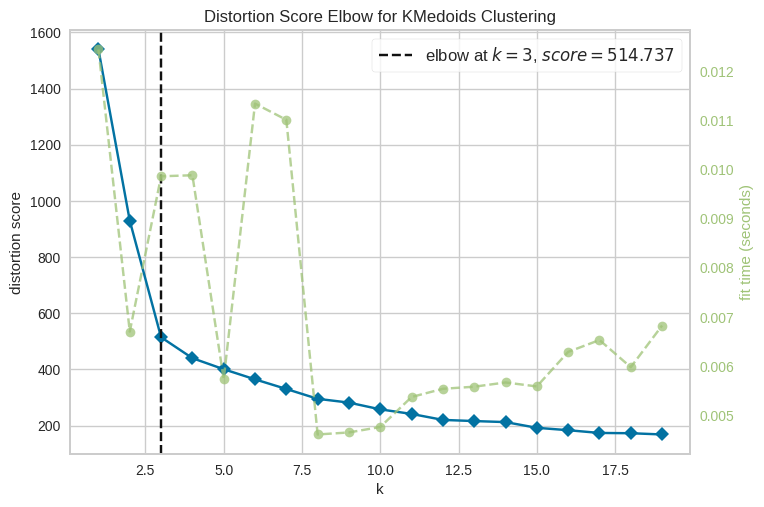

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_normalized) 
visualizer.poof()

#Calculo Sillhoutte
Sabendo o resultado do Elbow, vamos executar o Kmedoid com outros parâmetros afim de verificar o resultado obitido pelo elbow.

Para isso, utilizaremos 3 valores para k. O primeiro será o 3 (valor ótimo encontrado pelo elbow), o valor 9 e o valor 13.

In [37]:
testValues = [3, 9, 13]

for x in testValues:
  kmedoids = KMedoids(n_clusters=x).fit(df_normalized)
  labels = kmedoids.labels_

  print(f'Valor da Silhouette K={x}: {metrics.silhouette_score(df_normalized, labels)}')

Valor da Silhouette K=3: 0.4530804270167602
Valor da Silhouette K=9: 0.223303426319515
Valor da Silhouette K=13: 0.19695692847621843


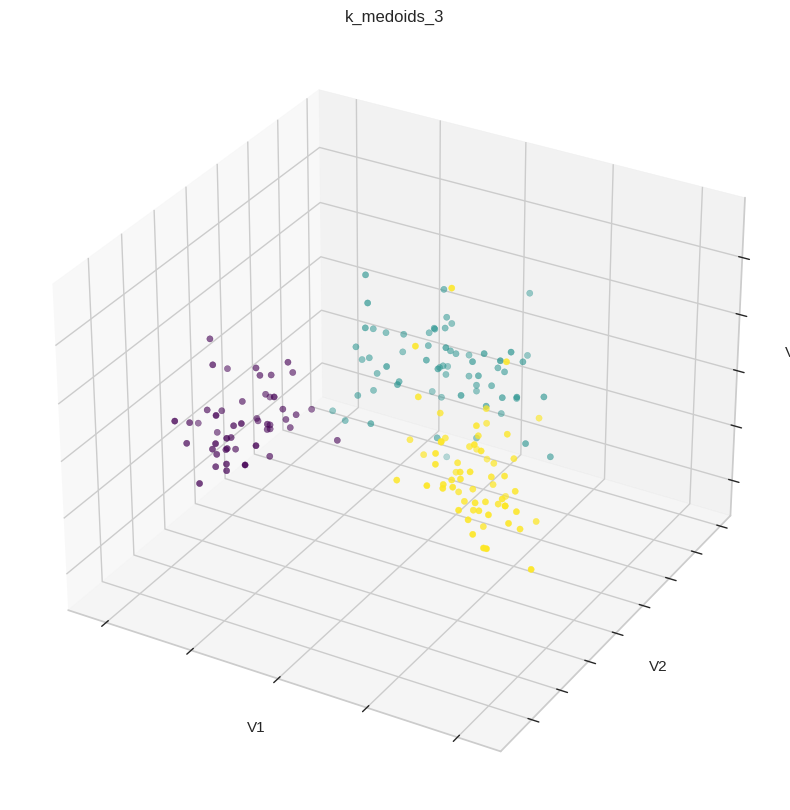

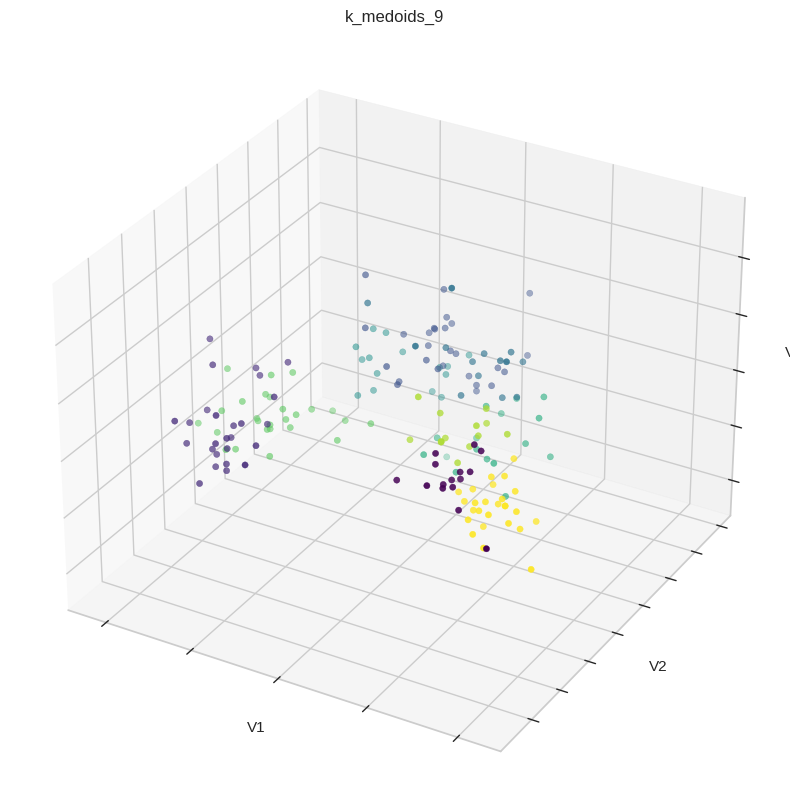

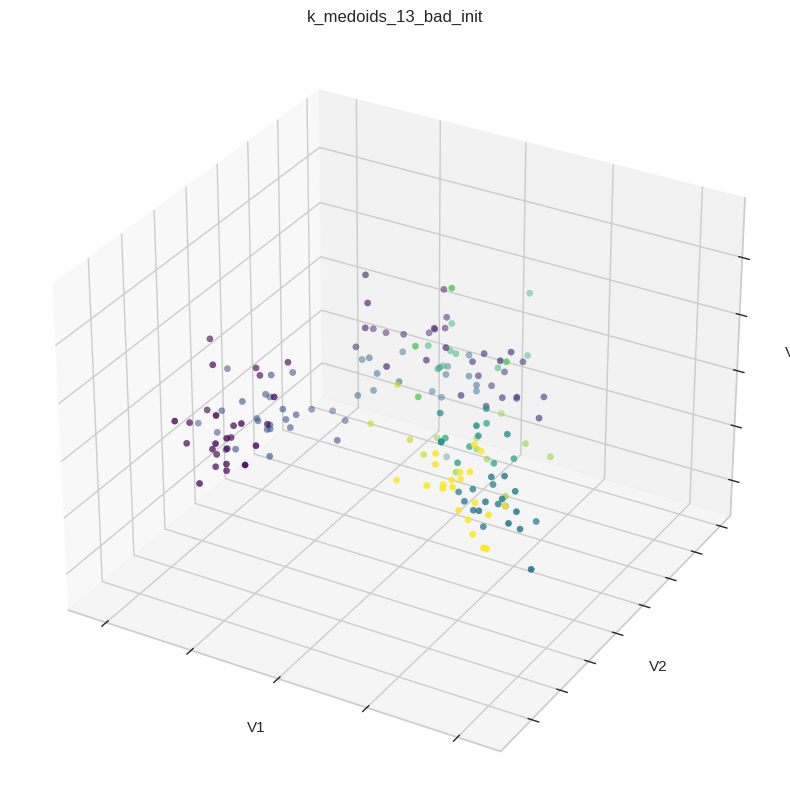

In [40]:
estimators = [
    ("k_medoids_3", KMedoids(n_clusters=3)),
    ("k_medoids_9", KMedoids(n_clusters=9)),
    ("k_medoids_13_bad_init", KMedoids(n_clusters=13, random_state=1)),
]

fignum = 1
titles = ["3 clusters", "9 clusters", "13 clusters, bad initialization"]

for name, est in estimators:
    fig = plt.figure(figsize=(10,10))
    plt.get_cmap('tab10')
    ax = fig.add_subplot(111, projection='3d')
    est.fit(df_normalized)
    labels = est.labels_
    ax.scatter(df_normalized[0], df_normalized[1], df_normalized[2],c=labels, cmap="viridis")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("V1")
    ax.set_ylabel("V2")
    ax.set_zlabel("V3")
    ax.set_title(name)

    fignum = fignum + 1

plt.show()